In [35]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
tdf = sns.load_dataset("titanic")

In [5]:
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
## "1" = survived 
## "0" = did not survived 

In [9]:
tdf= tdf.drop(["deck", "embark_town", "alive", "class", "who"], axis=1)

In [11]:
tdf = tdf.dropna()

In [19]:
tdf = pd.get_dummies(tdf, columns=["sex", "embarked"], drop_first=True)

In [21]:
tdf = tdf.drop(["embarked_Q", "embarked_S"], axis=1)


In [23]:
tdf.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,False
3,1,1,35.0,1,0,53.1000,False,False,False
4,0,3,35.0,0,0,8.0500,True,True,True


In [25]:
X = tdf.drop("survived", axis=1)
y = tdf["survived"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [29]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8037383177570093
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       122
           1       0.78      0.75      0.77        92

    accuracy                           0.80       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.80      0.80      0.80       214

Confusion Matrix:
 [[103  19]
 [ 23  69]]


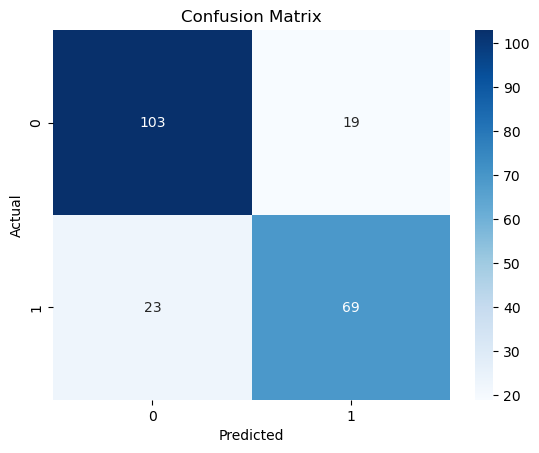

In [37]:


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Concept of linear regression and logistic regression
## and its use case 

## Linear Regression
Purpose: Predict a continuous numerical value

## Key Concept: Linear Regression 
Linear regression finds the best straight line (linear relationship) that fits through a set of data points.

## Example:
You want to predict a person's salary based on their years of experience.

X (independent variable): Years of experience

Y (dependent variable): Salary

The model tries to fit a line:
                     Y=b0 + b1X
## where 
b0 = intercept 
b1 = slope 

## Use Cases:
Predicting house prices

Forecasting sales

Estimating temperature, etc.

## Logistic Regression
Purpose: Predict a categorical outcome, especially binary (yes/no, 0/1, true/false)
## Key Concept:
Instead of a straight line, logistic regression uses a sigmoid (S-shaped) curve to estimate probabilities, and then classifies them into categories.

It outputs the probability of the event occurring, and converts it to 0 or 1 based on a threshold (usually 0.5).
               P(Y=1) = 1/1 + e-(b0 +b1X)

## Example:
You want to predict whether a patient has diabetes based on their BMI, glucose level, etc.

X (independent variables): Health measurements

Y (dependent variable): Has diabetes? (1 = Yes, 0 = No)

## Use Cases:
Email spam detection

Loan default prediction

Disease diagnosis (e.g., diabetes prediction)

Customer churn (stay or leave)
